# Preprocessing of pupil size data

### Import

Import of python libraries.

In [1]:
import sys
sys.path.append("../Pupillengröße/Skripte/")
#%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
import importlib
#import os
import os, getpass
import math
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))
#help(checkdata.plot)

Import of python modules.

In [2]:
import preprocessing
import plotting
import checkdata
import pup_config

### <u> Function 'plot':</u>
Defining the function 'plot' to use the function plot_preprocessed function from python module 'plotting'.  
parameter  
    df:   Dataframe which is plotted.
    text: Title of the plot.
    xcol: Variable represented on the x-axis.
    ycol: Variable represented on the y-axis.
        
### <u> Preparing:</u>
Define the subject_id. Load the data. Select the field and timestamp.
Create a variable that contains the values for the attributes of the dataclass ProcessConfing defined in the preprocessing module. Select the eye side.

### <u> Validation or Processing of data:</u>  
Decide if you only want to check the data and see if the attribute values fit the data and remove artefacts or if you want to process the data. If you only want to validate the data, set it True. If you want to process, set it False.  

### <u> Creation of variable:</u>  
The variable eye0 is created to store the return of the function process of the preprocessing module. Remarks are displayed to see the progress.

In [26]:
def plot(df,text,xcol,ycol):
    plotting.plot_preprocessed(df,text,xcol,ycol)
    
def noplot(df,text,xcol,ycol):
    pass

subject_id="PJ28_2_Ruhe"
data_dir=pup_config.data_dir

field="diameter"
ts="pupil_timestamp"

config=preprocessing.create_process_config(1,field,subject_id,data_dir)

# Set this to False, if you want to process the data
# Set this to True, if you only want to return an array of data checks 
config.validate_only=False

eye1=preprocessing.process(config,display)
# display(eye0)

'Starting process2'

'Loop through each annotation timestamp and slice the data'

'Label the data'

'preprocess and slice data'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=44.48524219742974'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

In [18]:
#doppelte Importe - "herausgeschmissen"


import preprocessing
import plotting
import math
import os, getpass
import pup_config

importlib.reload(preprocessing)
importlib.reload(plotting)
importlib.reload(pup_config)
#importlib.reload(checkdata)


importlib.reload(preprocessing)
importlib.reload(plotting)
importlib.reload(checkdata)
importlib.reload(pup_config)

<module 'pup_config' from '/Users/Katharina/Desktop/Pupille/notebooks/../Pupillengröße/Skripte/pup_config.py'>

### <u> Function 'plot':</u>
Calculating the number of frames in every stage. 

In [19]:
r=[(x.stage,x.remark) for x in eye0.frames]
pd=pandas.DataFrame(r,columns=["stage","remark"])
display(pd.groupby("stage")["stage"].count())
#print(eye0)

NameError: name 'pandas' is not defined

### <u> Displaying or plotting frames:</u>
If validate_only was set True, only the variable eye0 is displayed.
If validate_only was set False, the frames in eye0 are plotted with the plot function. 
The loops iterates over the frames in variable eye0. Only the data of the valid frames is plotted. Four different steps of data preprocessing are depicted in two subplots. Within the left subplot, the data is presented in a scatter plot. Within the right subplot, the data is presented in a line chart with coloured labels (before the annotation_timestamps red, during stimulation: blue, after stimulation: green). The titel of the plot are the annotation_timestamps of the frames. 
1. Original data is presented.
2. Data after appyling compute_and_reject_noise function from module preprocessing is plotted.
3. Data after applying reconstruct function from module preprocessing is plotted.
4. Data after applying interp_100 function from module preprocessing is plotted.

In [ ]:
if True:
    if config.validate_only:
        # no data, just a structure containing annotation indices and error estimates
        display(eye0) 
    else:
        for what_pf in eye0.frames:
            if what_pf.valid:
                what=what_pf.data
                ts=what['pupil_timestamp'].iloc[0]
                plot(what,f"frame @{ts}","pupil_timestamp_based",f"{field}_original")
                plot(what,f"gated @{ts}","pupil_timestamp_based",f"{field}_gated")
                plot(what,f"recon @{ts}","pupil_timestamp_based",f"{field}_rec")
                plot(what,f"interp @{ts}","pupil_timestamp_based",f"{field}_rec_interp_100")
        #
        #entfernen, da redundant?
        #if True:
            #for what_pf in eye0.frames:
                #if what_pf.valid:
                    #what=what_pf.data
                #plotting.plot_preprocessed(what,f"frame @what.pupil_timestamp[0]","pupil_timestamp_based",f"{field}_gated")

### <u> Plotting valid frames with baseline adjusted values:</u>
All valid frames in variable eye0 are plotted. On the y-axis, the baseline adjusted values are presented, on the x-axis the pupil timestamps in relation to the baseline period (pupil_timestamp_based) are presented. The different colours of the lines represent the different frames. The frames contain their annotation_timestamps in the legend on the right for identification.

'Anzahl der Messungen: 20'

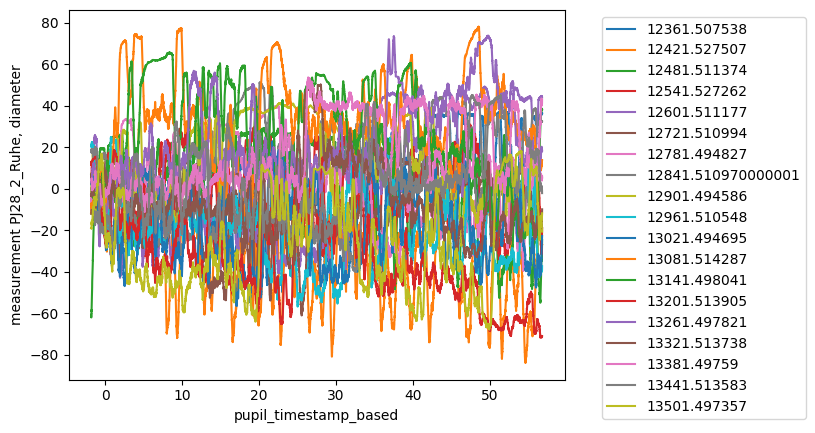

In [27]:
display(f"Anzahl der Messungen: {len(eye1.frames)}")
sub=None
i=0
for what_pf in eye1.frames:
    #display(what_pf)
    if what_pf.valid:
        what=what_pf.data
        ts=what_pf.annotation_ts
        # ts=what['pupil_timestamp'].iloc[0]
        # preprocessing.create_baseline_column(what, f'{field}_original',f'{field}_original_baseline')
        sub=what.plot(ax=sub, x='pupil_timestamp_based', y=f'{field}_baseline', ylabel='baseline adjusted pupil size', kind='line',label=ts)
        sub.set_ylabel(f'measurement {subject_id}, {field}')
         # Adjust the position of the legend
        legend = sub.legend()
        legend.set_bbox_to_anchor((1.5, 1))  # Adjust the position of the legend box

### <u> Displaying information about frames:</u>
The sum of valid and the total of frames are displayed. The index, baseline_mean, annotation_timestamp, zscore results, the last stage reached an remarks are displayed for all frames of variable eye0.

In [28]:
display(eye0.num_valid, len(eye1.frames))
display([(f.index,f.baseline_mean,f.annotation_ts,f.zscore,f.stage,f.remark) for f in eye1.frames])

39

20

[(0, 74.10858486261499, 12361.507538, 0.5434960844616069, 'finished', ''),
 (1, 103.11653841812587, 12421.527507, 1.9505967958833668, 'finished', ''),
 (2, 81.00939031199006, 12481.511374, 0.8782362873034618, 'finished', ''),
 (3, 54.91220660841026, 12541.527262, -0.38767051598550156, 'finished', ''),
 (4, 60.920768069061715, 12601.511177, -0.09621075858741947, 'finished', ''),
 (5,
  None,
  12661.527157,
  None,
  'preprocess',
  'measurement @12661.527157 has 44.48524219742974% more noise data after blinkreconstruct. Rejecting'),
 (6, 89.69893324974016, 12721.510994, 1.2997435138039408, 'finished', ''),
 (7, 67.07885643837922, 12781.494827, 0.20250216195290435, 'finished', ''),
 (8,
  57.02855324339149,
  12841.510970000001,
  -0.285012020962801,
  'finished',
  ''),
 (9, 65.61747203315946, 12901.494586, 0.13161418868342373, 'finished', ''),
 (10, 70.53961641484696, 12961.510548, 0.3703746668377788, 'finished', ''),
 (11, 70.16107163888785, 13021.494695, 0.3520124399906572, 'finishe

### <u> Plotting zscore results of baseline period in histogramm:</u>
The zscore results of all frames in variable eye0 are plotted in a histogramm, if they are valid or reached the stage zscore.

(array([2., 1., 1., 3., 2., 4., 1., 3., 1., 1.]),
 array([-1.84047957, -1.46137193, -1.08226429, -0.70315666, -0.32404902,
         0.05505861,  0.43416625,  0.81327389,  1.19238152,  1.57148916,
         1.9505968 ]),
 <BarContainer object of 10 artists>)

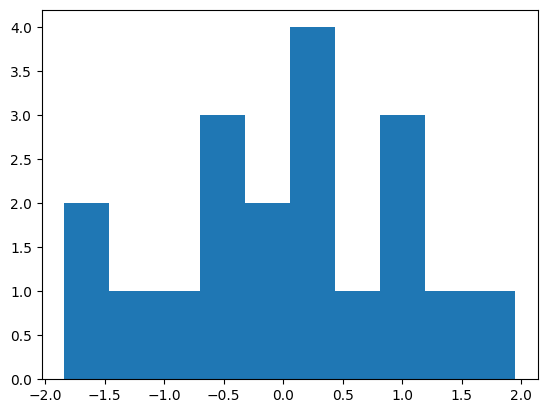

In [29]:
zscores=[f.zscore for f in eye1.frames if f.valid or f.stage=="zscore"]
plt.hist(zscores)

### <u> Testing methods to average values of frames:</u>
The application of the functions average_frames_by_resample and average_frames_by_binning is tested. The results are displayed and plotted. The new timestamp column is represented on the x-axis and the f'{field}_baseline' column on the y-axis.

ProcessConfig(eyenum=1, column='diameter', sfactor=1, data_path='/Users/Katharina/Desktop/Beispieldaten', subject_id='PJ29_4_Ruhe', condition='3.4Stim', timebase='3.4', stime_time_offset=0, after_var_start_offset=25.5, window_duration=29, nan_reconstruct_threshold=30, nan_before_threshold=0, nan_after_threshold=0, noise_threshold_factor=16, noise_rejection_percent=20, validate_only=False, survive_threshold=5, baseline_length=2.0)

,ts,diameter_baseline
0,0.0,-4.889722
1,0.1,-6.611888
2,0.2,-7.207931
3,0.3,-7.655331
4,0.4,-7.213845
...,...,...
566,56.6,-5.358229
567,56.7,-3.750285
568,56.8,-2.509579
569,56.9,NaN


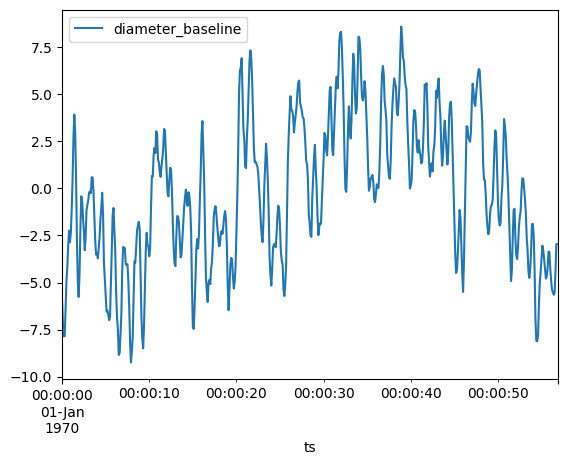

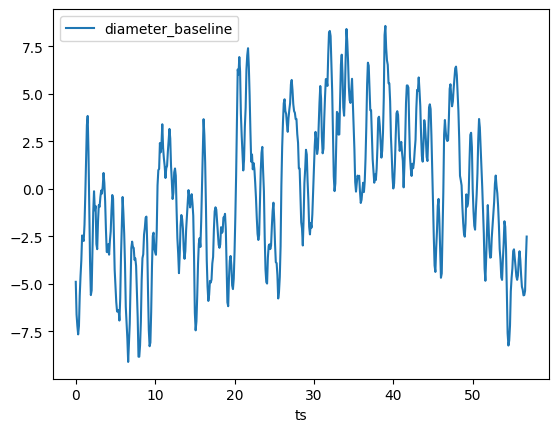

In [31]:
#importlib.reload(preprocessing)
av_df=preprocessing.average_frames_by_resample(eye1,f'{field}_baseline',interval='100ms') 
av_df.plot(x='ts',y=f'{field}_baseline')
av_df=preprocessing.average_frames_by_binning(eye1,f'{field}_baseline',interval_ms=100)
av_df.plot(x='ts',y=f'{field}_baseline')
#av_df=preprocessing.average_frames3(eye0,f'{field}_baseline',interval_ms=10)
#av_df.plot(x='ts',y=f'{field}_baseline')
display(eye0.config)
display(av_df)
